In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [112]:
df=pd.read_csv("wines_SPA.csv")

In [114]:
df.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
4971,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
742,Matarromera,Ribera del Duero Prestigio,2014,4.4,421,Espana,Ribera del Duero,41.32,Ribera Del Duero Red,NaN,NaN
4612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
2269,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
4207,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0


In [116]:
df.shape

(7500, 11)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [120]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [122]:
df['year'] = df['year'].fillna(0).astype(int) 

In [124]:
df = df[df['price'] > 0]


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 644.7+ KB


In [128]:
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [130]:
df.isnull().sum()/df.shape[0]*100

winery          0.000000
wine            0.000000
year            0.000000
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64

In [ ]:
#here no column is having percentage greater than or equal to 50 so no need of column removal

In [132]:
df.duplicated().sum()

5452

In [134]:
df = df.drop_duplicates(keep='first')

In [136]:
df.duplicated().sum()

0

In [138]:
df.shape

(2048, 11)

In [140]:
#identifiying the garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: count, Length: 480, dtype: int64
******************************
wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero    

In [142]:
# Remove invalid years (assuming wine can't be from the future or before 1800)
df = df[(df['year'] >= 1800) & (df['year'] <= 2025)]



# Ensure all prices are positive
df = df[df['price'] > 0]


In [144]:
df.shape

(1976, 11)

In [146]:
# Standardize common wine types
df['type'] = df['type'].replace({
    'Red': 'Generic Red',
    'White': 'Generic White',
    'Ribera Del Duero Red': 'Ribera Red',
    'Rioja Red': 'Rioja Red Wine'
    # Add more mappings if needed
})


In [148]:
df.describe(include="object")

,winery,wine,country,region,type
count,1976,1976,1976,1976,1877
unique,445,777,1,72,21
top,Vega Sicilia,Tinto,Espana,Ribera del Duero,Ribera Red
freq,96,56,1976,540,534


In [150]:
df = df.drop(columns=['country'])


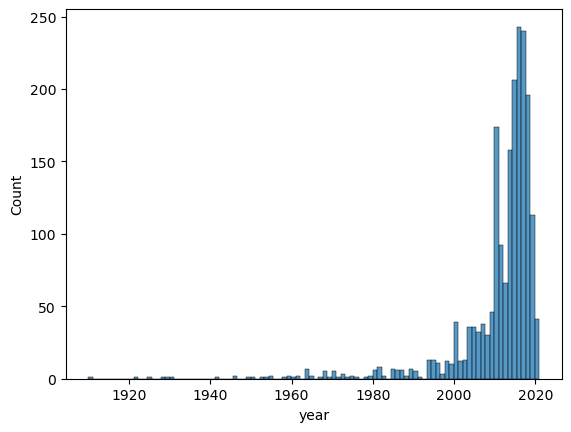

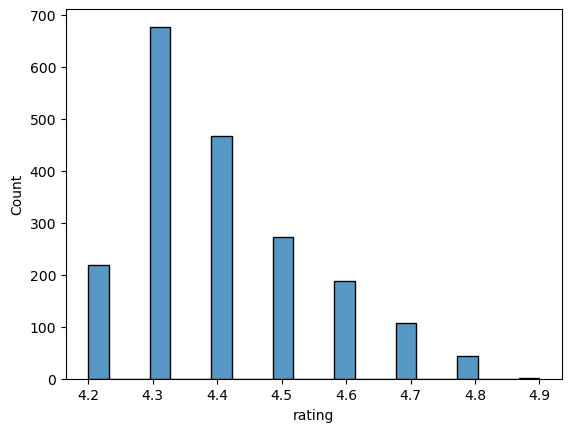

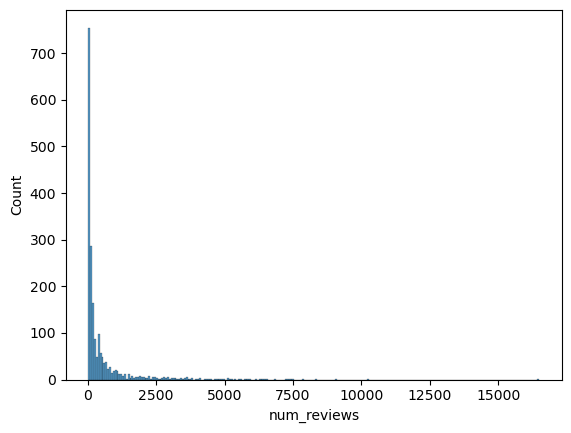

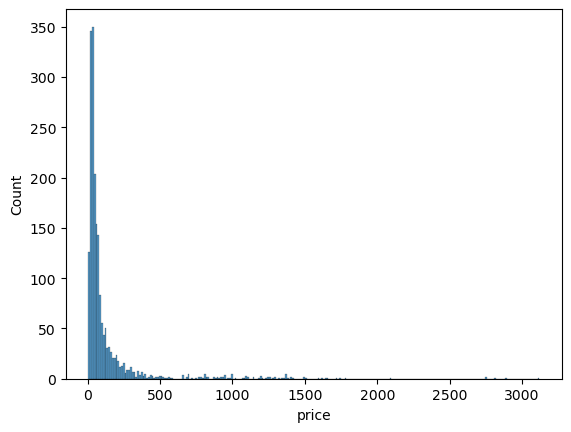

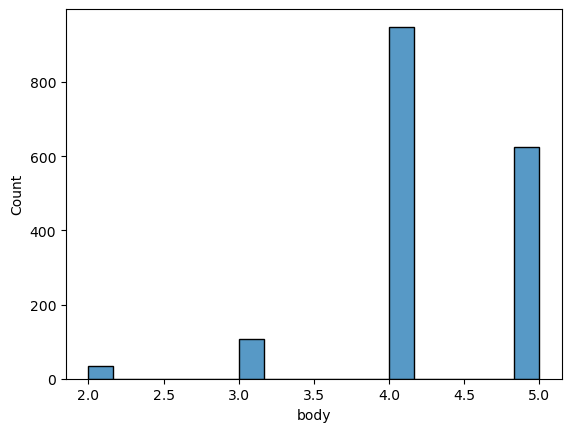

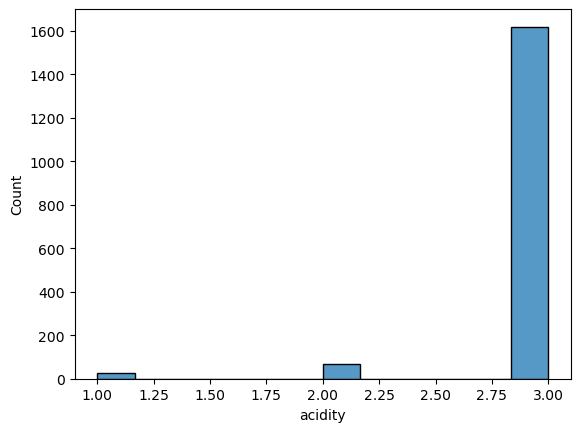

In [152]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [154]:
df.select_dtypes(include="number").columns

Index(['year', 'rating', 'num_reviews', 'price', 'body', 'acidity'], dtype='object')

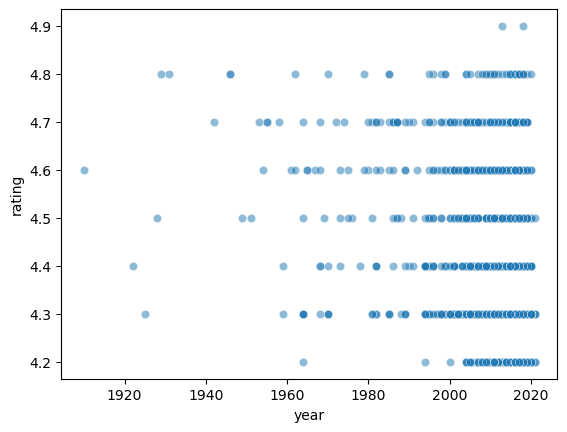

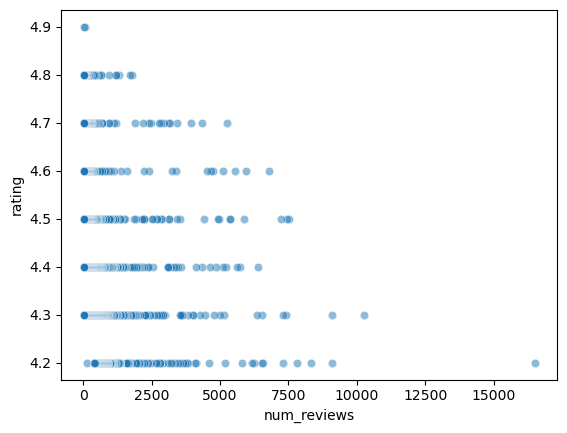

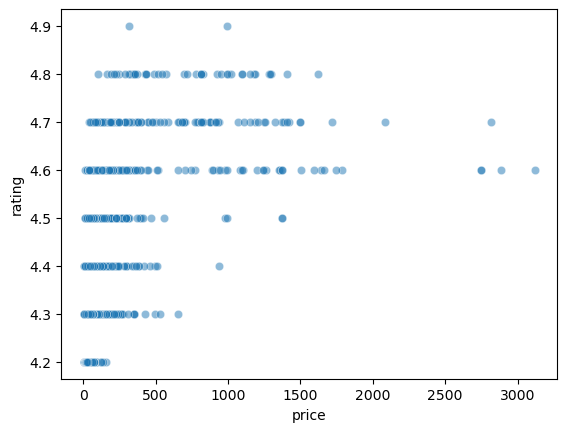

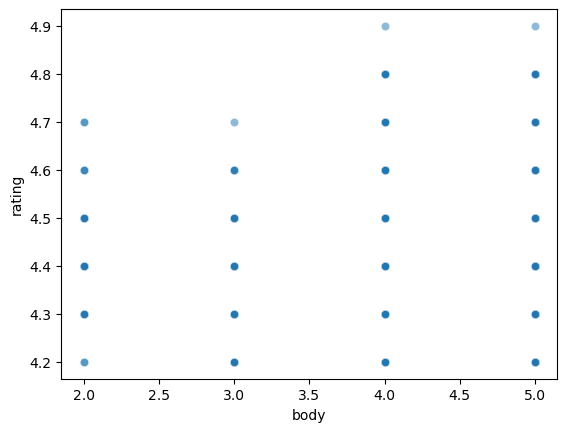

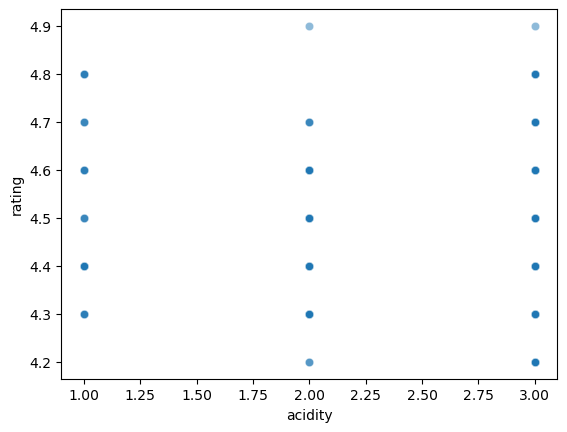

In [156]:
for i in ['year', 'num_reviews', 'price', 'body', 'acidity']:
    sns.scatterplot(data=df, x=i, y='rating', alpha=0.5)
    plt.show()

In [158]:
s=df.select_dtypes(include="number").corr()

<Axes: >

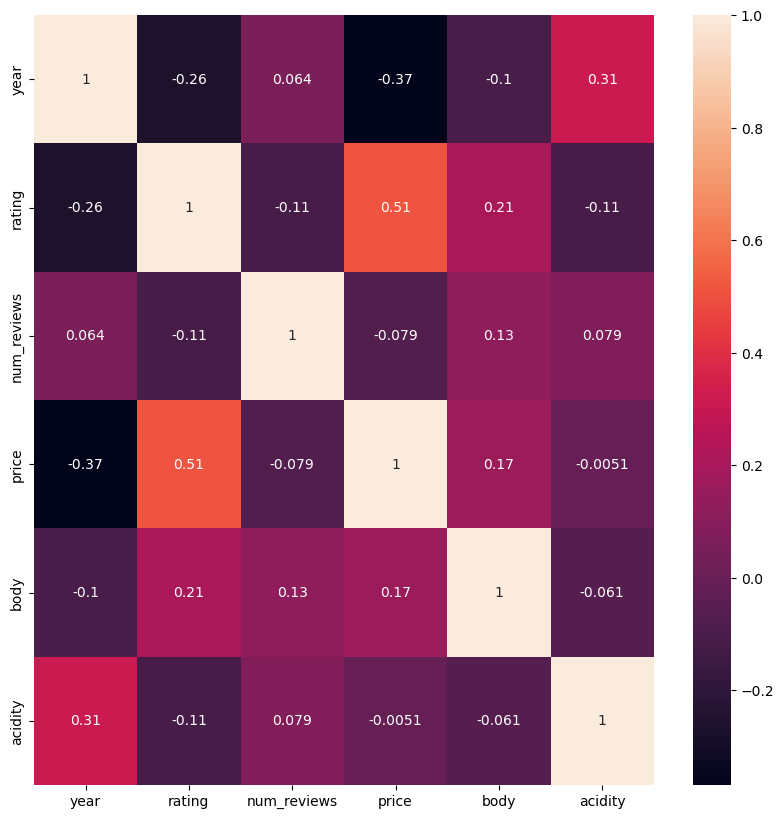

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [162]:
df.isnull().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
region           0
price            0
type            99
body           262
acidity        262
dtype: int64

In [164]:

for i in ["type", "body", "acidity"]:
    if df[i].dtype in [np.int64, np.float64]:  
        df[i] = df[i].fillna(df[i].median()) 


In [166]:
for i in ["type"]:  # List of categorical columns
    df[i] = df[i].fillna(df[i].mode()[0])  # Fill with most frequent value


In [105]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [107]:
df.shape

(1976, 10)